# Tarefa 2 - Parte 2
MO444A - Aprendizado de Máquina e Reconhecimento de Padrões

> Aplicação de métodos de aprendizado supervisionado para resolver problemas de predição e classificação

__Alunos__:

- Leonardo Augusto Silva Bernardes - RA: 233548<br>
Desenvolveu a parte 2 do trabalho e revisou a parte 1.


- Yan Prada - RA: 118982<br>
Desenvolveu a parte 1 do trabalho e revisou a parte 2.

Tivemos reuniões para que cada um explicasse o que estava fazendo, enquanto o outro sugerisse ou resolvesse dúvidas pendentes.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import GridSearchCV

- __Carregando o dataset__

Como o dataset é nativo do sklearn os dados já vem separados em "data" (dados de entrada) e "target" (variável resposta)

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
X = digits.data
y = digits.target

Dimensões das features de entrada e da varíavel target

In [4]:
print('X:',X.shape)
print('y:',y.shape)

X: (1797, 64)
y: (1797,)


Analisando a quantidade de amostras por dígito para verificar o balanceamento entre as classes. Conclui-se que as classes são balanceadas

In [5]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 178,
 1: 182,
 2: 177,
 3: 183,
 4: 181,
 5: 182,
 6: 181,
 7: 179,
 8: 174,
 9: 180}

Redução dos dados para 2 dimensões utilizando UMAP

In [6]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(X)
embedding.shape

(1797, 2)

Plot dos dados reduzidos

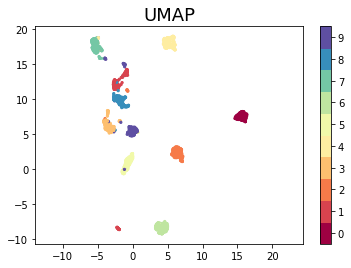

In [7]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP', fontsize=18);

Split dos dados entre treino e teste mantendo 90% para treino e 10% para testes

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

__1º modelo supervisionado: Regressão Logística__

Implementação do modelo de regressão logística utilizando GridSearchCV.

O GridSearchCV realiza a busca de melhores hiperparâmetros utilizando validação cruzada para cada combinação de hiperparâmetros e retorna quais alcançaram um melhor score.

Neste caso como é um problema de classificação, automaticamente o GridSearchCV utiliza o StratifiedKfold para a validação cruzada. O StratifiedKfold que é bastante indicado para problemas de classificação, no qual ele mantém a mesma proporção entre as classes nos folds.

Foi utilizado 5 folds e os hiperparâmetros testados para a regressão logística foram:

__C__: o parâmetro de regularização<br>
__penalty__: tipo de penalização l1 (lasso) ou l2 (ridge)


A métrica utilizada como retorno foi a própria acurácia, pois, dado o problema que queremos resolver de classificação de dígitos o que mais nos interesse é se a classificação foi feita correta ou não, e também, pelo fato dos dados serem balanceados não há problemas em utilizar a acurácia.

In [20]:
from sklearn.linear_model import LogisticRegression

valores_C = np.array([0.01, 0.05, 0.1, 0.5, 1, 2, 3, 5, 10, 20, 50, 100])
#valores_max_iter = np.array([50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
regularizacao = ['l1','l2']
#valores_grid = {'C':valores_C, 'penalty':regularizacao, 'max_iter':valores_max_iter}
valores_grid = {'C':valores_C, 'penalty':regularizacao}

model_lr = LogisticRegression(solver='liblinear')

grid_model_lr = GridSearchCV(estimator=model_lr, param_grid=valores_grid, scoring='accuracy', cv=5,
                            return_train_score=True)
grid_model_lr.fit(X_train,y_train)

melhor_modelo_lr = grid_model_lr.best_estimator_

print('Acurácia média nos dados de treino:', grid_model_lr.cv_results_['mean_train_score'].mean())
print('Acurácia média nos dados de validação:', grid_model_lr.cv_results_['mean_test_score'].mean())
print('\nMelhores parâmetros:', grid_model_lr.best_params_)
print('Acurácia do melhor modelo:', grid_model_lr.best_score_)

Acurácia média nos dados de treino: 0.9931842107045706
Acurácia média nos dados de validação: 0.9525553740014523

Melhores parâmetros: {'C': 0.1, 'penalty': 'l1'}
Acurácia do melhor modelo: 0.9653613882200054


Os resultados das métricas apresentadas tanto na base de treino e quanto na base de validação apresentaram uma boa capacidade de generalização e não há evidências de overfitting ou underfitting. 

__2º modelo supervisionado: Árvore de Decisão__

Implementação do modelo de árvore de decisão utilizando os mesmos métodos utilizando a busca de hiperparâmetros e a mesma divisão de 5 folds.

A métrica utilizada como retorno também foi a acurácia pelos mesmos motivos citados no modelo de regressão logística.

Os hiperparâmetros testados para a regressão logística foram:

__min_samples_split___: número de amostras mínimas para considerar um nó para divisão<br>
__max_depth__: profundidade máxima da árvore<br>
__criterion__: medida de qualidade do split para o cálculo de ganho de informação

In [15]:
from sklearn.tree import DecisionTreeClassifier

min_samples_split = np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15])
max_depth = np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15])
algorit = ['gini','entropy']
valores_grid = {'min_samples_split':min_samples_split,'max_depth':max_depth,'criterion':algorit}

model_dt = DecisionTreeClassifier()

grid_model_dt = GridSearchCV(estimator=model_dt, param_grid=valores_grid, cv=5, scoring='accuracy',
                             return_train_score=True)
grid_model_dt.fit(X_train,y_train)

melhor_modelo_dt = grid_model_dt.best_estimator_

print('Acurácia média nos dados de treino:', grid_model_dt.cv_results_['mean_train_score'].mean())
print('Acurácia média nos dados de validação:', grid_model_dt.cv_results_['mean_test_score'].mean())
print('\nMelhores parâmetros:', grid_model_dt.best_params_)
print('Acurácia do melhor modelo:', grid_model_dt.best_score_)

Acurácia média nos dados de treino: 0.8326851141414763
Acurácia média nos dados de validação: 0.7473263233168511

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 2}
Acurácia do melhor modelo: 0.8608416466001605


Para o algoritmo de árvores de decisão os resultados das métricas apresentadas tanto na base de treino e quanto na base de validação e também o melhor modelo encontrado não obtiveram uma boa performance.

__Avaliação do melhor modelo__

Após testar dois modelos supervisionados distintos a conclusão é que a regressão logística apresentou melhores resultados na base de validação.

- Acurácia regressão logística: 0.9525550554854819<br>
- Acurácia árvore de decisão: 0.7473263233168511

Teste do modelo com os dados de teste e plot da matriz de confusão.

Score: 0.9611111111111111


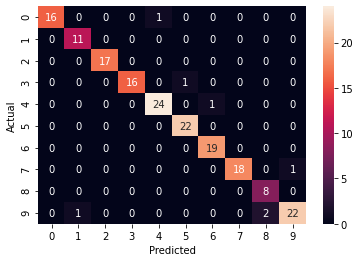

Precision: 0.9539710144927538
Recall: 0.9669721362229102
F1-Score: 0.9586580959189653


In [16]:
from sklearn.metrics import precision_recall_fscore_support

y_pred = melhor_modelo_lr.predict(X_test)
score = melhor_modelo_lr.score(X_test, y_test)
print('Score:',score)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()


p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='macro')

print('Precision:',p)
print('Recall:',r)
print('F1-Score:',f)

Gerando apenas mais uma comparação entre os modelos através da métrica ROC AUC (área abaixo da curva) e nela percebemos que a regressão logística continua obtendo melhores resultados.

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_lr = melhor_modelo_lr.predict_proba(X_test)
y_prob_dt = melhor_modelo_dt.predict_proba(X_test)

macro_roc_auc_ovr_lr = roc_auc_score(y_test, y_prob_lr, multi_class="ovr", average="macro")
macro_roc_auc_ovr_dt = roc_auc_score(y_test, y_prob_dt, multi_class="ovr", average="macro")

print("One-vs-Rest ROC AUC scores (macro) - Regressão Logística:\n",macro_roc_auc_ovr_lr)
print("One-vs-Rest ROC AUC scores (macro) - Árvore de Decisão:\n",macro_roc_auc_ovr_dt)

One-vs-Rest ROC AUC scores (macro) - Regressão Logística:
 0.9994840129309717
One-vs-Rest ROC AUC scores (macro) - Árvore de Decisão:
 0.9573049905570127
